In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
data = pd.read_csv("energy_efficiency_data.csv")   # rename file if needed
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# Rename columns for convenience
data.columns = ['RelativeCompactness','SurfaceArea','WallArea','RoofArea',
                'OverallHeight','Orientation','GlazingArea',
                'GlazingAreaDistribution','HeatingLoad','CoolingLoad']

# Check for missing values
print(data.isnull().sum())


RelativeCompactness        0
SurfaceArea                0
WallArea                   0
RoofArea                   0
OverallHeight              0
Orientation                0
GlazingArea                0
GlazingAreaDistribution    0
HeatingLoad                0
CoolingLoad                0
dtype: int64


In [4]:
X = data.iloc[:, :-2]  # independent variables
y1 = data['HeatingLoad']
y2 = data['CoolingLoad']


In [5]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)


In [6]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}


In [7]:
def evaluate_model(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        results.append([name, mae, rmse, r2])
    return pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R² Score"])

heating_results = evaluate_model(models, X_train, X_test, y1_train, y1_test)
cooling_results = evaluate_model(models, X_train2, X_test2, y2_train, y2_test)


In [8]:
print("🔥 Heating Load Performance:")
display(heating_results.sort_values(by="R² Score", ascending=False))

print("\n❄️ Cooling Load Performance:")
display(cooling_results.sort_values(by="R² Score", ascending=False))


🔥 Heating Load Performance:


,Model,MAE,RMSE,R² Score
4,Random Forest,0.354648,0.490798,0.997689
3,Decision Tree,0.424805,0.620644,0.996304
0,Linear Regression,2.182047,3.025424,0.912184
1,Ridge Regression,2.313548,3.107001,0.907384
2,Lasso Regression,2.333995,3.121367,0.906526



❄️ Cooling Load Performance:


,Model,MAE,RMSE,R² Score
4,Random Forest,1.060435,1.712920,0.968334
3,Decision Tree,1.155130,2.017224,0.956083
0,Linear Regression,2.195295,3.145382,0.893226
1,Ridge Regression,2.292378,3.216411,0.888349
2,Lasso Regression,2.298880,3.229245,0.887456


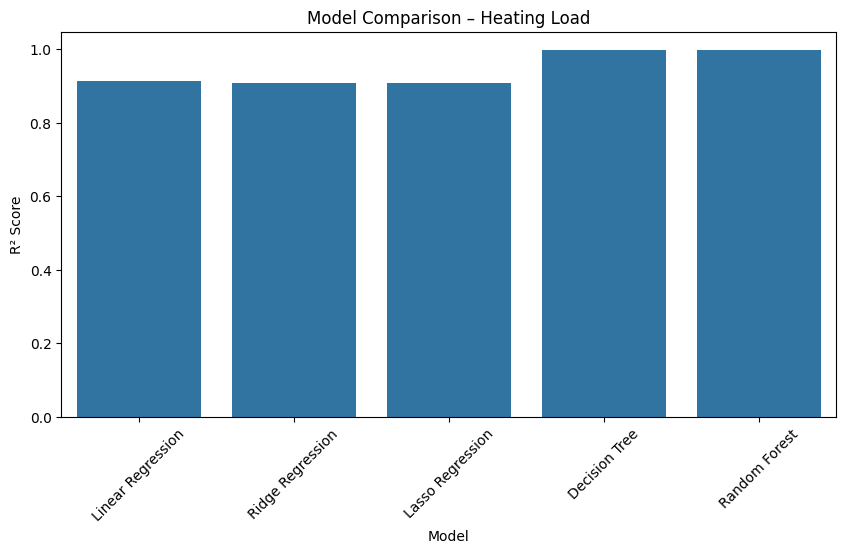

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='R² Score', data=heating_results)
plt.title("Model Comparison – Heating Load")
plt.xticks(rotation=45)
plt.show()


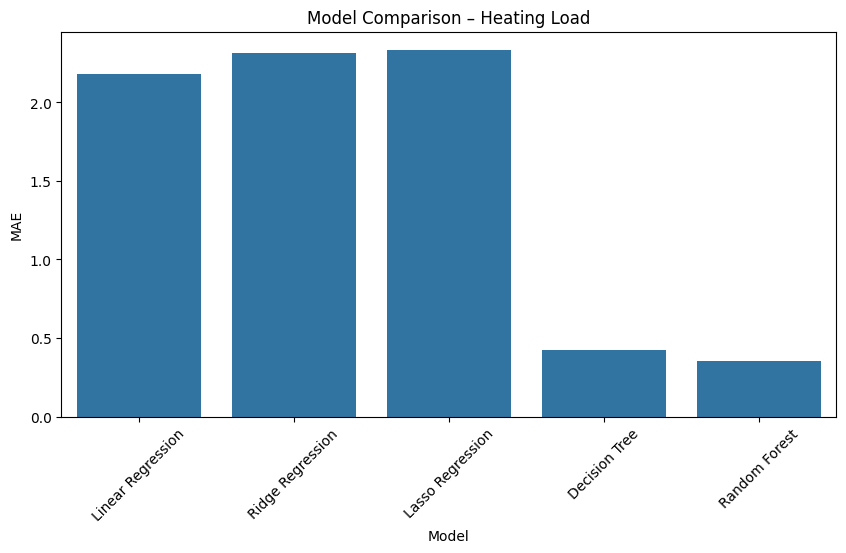

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='MAE', data=heating_results)
plt.title("Model Comparison – Heating Load")
plt.xticks(rotation=45)
plt.show()